# Storage Model <- get $q_i$

big_bird6

## Creating the Model

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import sys

sys.path.append(r'C:\dev\code\Gazprom_MT\pricing')
sys.path.append(r'C:\git\smartdata')

import smartdata
from smartdata.utils.common import print_attributes as pa
from smartdata.utils.dframe import display_full_df as ddff
from smartdata.utils.common import to_namedtuple
from smartdata.utils.file import read_from_json, create_file_name
from smartdata import SmartData


C:\dev\code\Gazprom_MT\pricing\gazprom\mt\pricing\models\storage\bigbirdpy\test\test_payoff.py

In [3]:
from gazprom.mt.pricing.models.storage.bigbirdpy.test.test_payoff import *

In [4]:
self = TestPayoff()

In [5]:
pricing_date = pd.datetime(2018, 10, 30)
env_evmlt = self.build_env_evmlt(pricing_date)
valuation_params = self.build_valuation_params() #<--- artificial environment
payoff = build_payoff(BUY)
bwd_res = payoff.pv_greeks(env_evmlt, keep_decision_tree=True, **valuation_params)


bespoke_printing_of_decisions
 [[  9.69     9.8517   9.5017   9.1517   9.0117   9.2917   8.9417   8.5917
    8.2417   8.1717   8.3817   8.0317   7.6817   7.3317   7.1      6.75
    6.4917   6.05     5.7      5.6517   0.    ]
 [  9.69     9.8517   9.5017   9.1517   9.0117   9.2917   8.9417   8.5917
    8.2417   8.1717   8.3817   8.0317   7.6817   7.3317   7.1      6.75
    6.4917   6.05     5.7      5.6517   0.    ]
 [  9.69     9.8517   9.5017   9.1517   9.0117   9.2917   8.9417   8.5917
    8.2417   8.1717   8.3817   8.0317   7.6817   7.3317   7.1      6.75
    6.4917   6.05     5.7      5.6517   0.    ]
 [  9.69     9.8517   9.5017   9.1517   9.0117   9.2917   8.9417   8.5917
    8.2417   8.1717   8.3817   8.0317   7.6817   7.3317   7.1      6.75
    6.4917   6.05     5.7      5.6517   0.    ]
 [  9.69     9.8517   9.5017   9.1517   9.0117   9.2917   8.9417   8.5917
    8.2417   8.1717   8.3817   8.0317   7.6817   7.3317   7.1      6.75
    6.4917   6.05     5.7      5.6517   0.    

In [6]:
bwd_res.keys()

dict_keys(['pv', 'delta', 'cash'])

In [7]:
bwd_res['pv']

2353.4382835336314

In [8]:
bwd_res['cash']

0.0

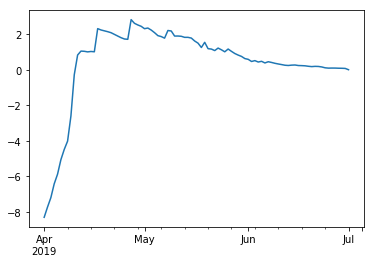

In [9]:
bwd_res['delta'].plot()

***

In [10]:
from itertools import product
import pytest
from numpy.testing import (
    assert_allclose,
    assert_raises,
    TestCase
)
from pandas.util.testing import assert_index_equal, assert_series_equal
import numpy as np
import pandas as pd

from gazprom.mt.pricing.models.storage import StorageConstraints, Storage
from gmt.util.common.exceptions import ArgumentError
from gazprom.mt.pricing.models.swing.fixed_price import FixedPriceSwing
from gazprom.mt.pricing.models.swing import SwingConstraints
from gmt.util.quant.stdvalue import StdValueSeries
from gazprom.mt.pricing.environment.greeks_calculator import (
    NumericalGreeksCalculator
)
from gazprom.mt.pricing.environment.environment import (
    KEY_TYPE_PRICE, KEY_TYPE_VOL, KEY_TYPE_IR
)
from gazprom.mt.pricing.models.exercise import Exercise
from gazprom.mt.pricing.models.constants import (
    KEY_ACTIONS, KEY_EXERCISE, KEY_CASHFLOWS, KEY_CASH_STRIKE, ARG_BUCKETED,
    KEY_VEGA_BLENDED, KEY_VEGA_MONTHLY, KEY_DELTA, KEY_VEGA_DAILY,
    KEY_VEGA_MONTHLY_PARAM, KEY_THETA, KEY_PV, KEY_CASH, BUY, SELL, CALL, PUT,
    KEY_THETA_MARKET
)
from gmt.util.quant.assert_util import (
    assert_sv_equal, assert_svseries_equal, assert_svframe_equal
)
from gazprom.mt.pricing.data.date_rule import (
    SameDay, DayAhead, BusinessDayAhead,
)
from gazprom.mt.pricing.models.swing.test.swing_market_data import (
    build_env, env_blended_to_daily, linear_prices, vol_blended,
    vol_intramonth, MKT, CCY, DELTA_SHIFT, VEGA_SHIFT, buckets
)
from gmt.util.common.tools import report
from gmt.util.common.testing import assert_equal

In [11]:
import numpy as np
from numpy import pi, NaN, Inf
import pandas as pd
from gazprom.mt.pricing.models.timeseries.multifactor import MultiFactorSimulator, MultiCommoditySimulator

## Environment

In [12]:
env = Environment(pricing_date, currency='unused')
dates = pd.date_range(pricing_date, pd.datetime(2020, 3, 31))
max_day = pd.datetime(2019, 5, 2)
f_curve = partial(periodic_curve, period=0.5)
fwd_curve = f_curve(max_day, 45.0, 12.0, dates)
env.add_price(NBP, fwd_curve)
env.add_price(GBP, pd.Series(0.05, dates))
vol_curve = f_curve(max_day, 0.52, 0.18, dates)

In [13]:
f_curve

functools.partial(<function periodic_curve at 0x00000184E71605E8>, period=0.5)

In [14]:
env, vol_curve, _ = self.build_env(pricing_date)
env.add_vol(NBP, data=None, vol_model=VolModelExponential,
            calibrator=None, alpha=20.0,
            sigma=vol_curve,
            builder='ffill_m')

In [15]:
cases = [BUY, SELL]
pricing_date = pd.datetime(2018, 10, 30)
env_evmlt = self.build_env_evmlt(pricing_date)
env_evm = self.build_env_evm(pricing_date)
valuation_params = self.build_valuation_params()
valuation_params_pv_only = self.build_valuation_params(pv_only=True)

In [16]:
cases = product(
    [env_evmlt, env_evm],
    [valuation_params_pv_only, valuation_params],
    [BUY, SELL]
)
for env, val_params, buy_sell in cases:
    payoff = build_payoff(buy_sell)
    pos = payoff.position
    res = payoff.pv_greeks(env, **val_params, keep_decision_tree=True)
   


bespoke_printing_of_decisions
 [[  9.69     9.8517   9.5017   9.1517   9.0117   9.2917   8.9417   8.5917
    8.2417   8.1717   8.3817   8.0317   7.6817   7.3317   7.1      6.75
    6.4917   6.05     5.7      5.6517   0.    ]
 [  9.69     9.8517   9.5017   9.1517   9.0117   9.2917   8.9417   8.5917
    8.2417   8.1717   8.3817   8.0317   7.6817   7.3317   7.1      6.75
    6.4917   6.05     5.7      5.6517   0.    ]
 [  9.69     9.8517   9.5017   9.1517   9.0117   9.2917   8.9417   8.5917
    8.2417   8.1717   8.3817   8.0317   7.6817   7.3317   7.1      6.75
    6.4917   6.05     5.7      5.6517   0.    ]
 [  9.69     9.8517   9.5017   9.1517   9.0117   9.2917   8.9417   8.5917
    8.2417   8.1717   8.3817   8.0317   7.6817   7.3317   7.1      6.75
    6.4917   6.05     5.7      5.6517   0.    ]
 [  9.69     9.8517   9.5017   9.1517   9.0117   9.2917   8.9417   8.5917
    8.2417   8.1717   8.3817   8.0317   7.6817   7.3317   7.1      6.75
    6.4917   6.05     5.7      5.6517   0.    


bespoke_printing_of_decisions
 [[  9.69     9.8517   9.5017   9.1517   9.0117   9.2917   8.9417   8.5917
    8.2417   8.1717   8.3817   8.0317   7.6817   7.3317   7.1      6.75
    6.4917   6.05     5.7      5.6517   0.    ]
 [  9.69     9.8517   9.5017   9.1517   9.0117   9.2917   8.9417   8.5917
    8.2417   8.1717   8.3817   8.0317   7.6817   7.3317   7.1      6.75
    6.4917   6.05     5.7      5.6517   0.    ]
 [  9.69     9.8517   9.5017   9.1517   9.0117   9.2917   8.9417   8.5917
    8.2417   8.1717   8.3817   8.0317   7.6817   7.3317   7.1      6.75
    6.4917   6.05     5.7      5.6517   0.    ]
 [  9.69     9.8517   9.5017   9.1517   9.0117   9.2917   8.9417   8.5917
    8.2417   8.1717   8.3817   8.0317   7.6817   7.3317   7.1      6.75
    6.4917   6.05     5.7      5.6517   0.    ]
 [  9.69     9.8517   9.5017   9.1517   9.0117   9.2917   8.9417   8.5917
    8.2417   8.1717   8.3817   8.0317   7.6817   7.3317   7.1      6.75
    6.4917   6.05     5.7      5.6517   0.    

In [17]:
tree = res.info['tree']

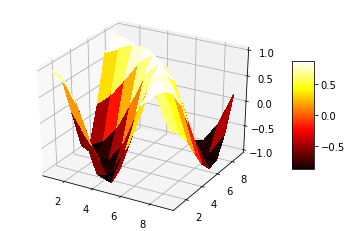

In [18]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

X = np.arange(1, 10)
Y = np.arange(1, 10)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)
fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='hot', linewidth=0, antialiased=False)
ax.set_zlim(-1.01, 1.01)

fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

In [19]:
tree.tree_start

Timestamp('2018-10-31 00:00:00')

In [20]:
tree.tree_end

Timestamp('2019-07-01 00:00:00')

In [21]:
bwd_res = payoff.pv_greeks(
            env_evmlt, keep_decision_tree=True, **valuation_params)


bespoke_printing_of_decisions
 [[  9.69     9.8517   9.5017   9.1517   9.0117   9.2917   8.9417   8.5917
    8.2417   8.1717   8.3817   8.0317   7.6817   7.3317   7.1      6.75
    6.4917   6.05     5.7      5.6517   0.    ]
 [  9.69     9.8517   9.5017   9.1517   9.0117   9.2917   8.9417   8.5917
    8.2417   8.1717   8.3817   8.0317   7.6817   7.3317   7.1      6.75
    6.4917   6.05     5.7      5.6517   0.    ]
 [  9.69     9.8517   9.5017   9.1517   9.0117   9.2917   8.9417   8.5917
    8.2417   8.1717   8.3817   8.0317   7.6817   7.3317   7.1      6.75
    6.4917   6.05     5.7      5.6517   0.    ]
 [  9.69     9.8517   9.5017   9.1517   9.0117   9.2917   8.9417   8.5917
    8.2417   8.1717   8.3817   8.0317   7.6817   7.3317   7.1      6.75
    6.4917   6.05     5.7      5.6517   0.    ]
 [  9.69     9.8517   9.5017   9.1517   9.0117   9.2917   8.9417   8.5917
    8.2417   8.1717   8.3817   8.0317   7.6817   7.3317   7.1      6.75
    6.4917   6.05     5.7      5.6517   0.    

In [22]:
payoff.default_pricer

BigBirdPyPricer(_payoff=BigBirdPyPayoff [sell, GBP])

In [23]:
inner_pricer = bwd_res.info['pricer']
inner_valuation_params = bwd_res.info['valuation_params']
tree, decision_tree = bwd_res.info['tree'], bwd_res.info['decision_tree']
volume_tree = bwd_res.info['volume_tree']

In [24]:
volume_tree

[array([33.]),
 array([25.69, 30.69, 35.69, 40.69, 42.69]),
 array([13.69, 18.69, 23.69, 28.69, 33.69, 38.69, 43.69, 48.69, 53.69,
        54.69]),
 array([ 1.69,  6.69, 11.69, 16.69, 21.69, 26.69, 31.69, 36.69, 41.69,
        46.69, 51.69, 56.69, 61.69, 66.69]),
 array([ 0.  ,  5.  , 10.  , 15.  , 20.  , 25.  , 30.  , 35.  , 40.  ,
        45.  , 50.  , 55.  , 60.  , 65.  , 70.  , 75.  , 78.69]),
 array([ 0.  ,  5.  , 10.  , 15.  , 20.  , 25.  , 30.  , 35.  , 40.  ,
        45.  , 50.  , 55.  , 60.  , 65.  , 70.  , 75.  , 80.  , 85.  ,
        90.  , 90.69]),
 array([  0.,   5.,  10.,  15.,  20.,  25.,  30.,  35.,  40.,  45.,  50.,
         55.,  60.,  65.,  70.,  75.,  80.,  85.,  90.,  95., 100.]),
 array([  0.,   5.,  10.,  15.,  20.,  25.,  30.,  35.,  40.,  45.,  50.,
         55.,  60.,  65.,  70.,  75.,  80.,  85.,  90.,  95., 100.]),
 array([  0.,   5.,  10.,  15.,  20.,  25.,  30.,  35.,  40.,  45.,  50.,
         55.,  60.,  65.,  70.,  75.,  80.,  85.,  90.,  95., 100.]),
 

In [27]:
tree.num_step         

243

In [28]:
pa(tree)


Public attributes
----------------------------------------------------------------------------------------------------
L                    | num_step         
branch_types         | price_levels_size
index                | tree             
j_max                | tree_end         
max_price_levels_size| tree_refs        
next_nodes_index     | tree_start       


Private attributes:
----------------------------------------------------------------------------------------------------



Class specific attributes:
----------------------------------------------------------------------------------------------------
__class__        | __lt__          
__delattr__      | __module__      
__dict__         | __ne__          
__dir__          | __new__         
__doc__          | __reduce__      
__eq__           | __reduce_ex__   
__format__       | __repr__        
__ge__           | __setattr__     
__getattribute__ | __sizeof__      
__gt__           | __slotnames__   
__hash__         | _

In [29]:
tree.tree

array([[[5.69989798e+01, 1.00000000e+00, 1.00000000e+00, 1.66666667e-01,
         6.66666667e-01, 1.66666667e-01],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00],
        ...,
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00]],

       [[5.35496363e+01, 9.39512447e-01, 1.66666667e-01, 1.41428022e-01,
         6.63823607e-01, 1.94748371e-01],
        [5.69610403e+01, 9.99364516e-01, 6.66666667e-01, 1.66666667e-01,
         6.66666667e-01, 1.66666667e-01],
        [6.05897693e+01, 1.06302949e+00, 1.66666667e-01, 1.947483

In [30]:
volume = tree.tree

ValueError: 'c' argument has 13176 elements, which is not acceptable for use with 'x' with size 13176, 'y' with size 13176.

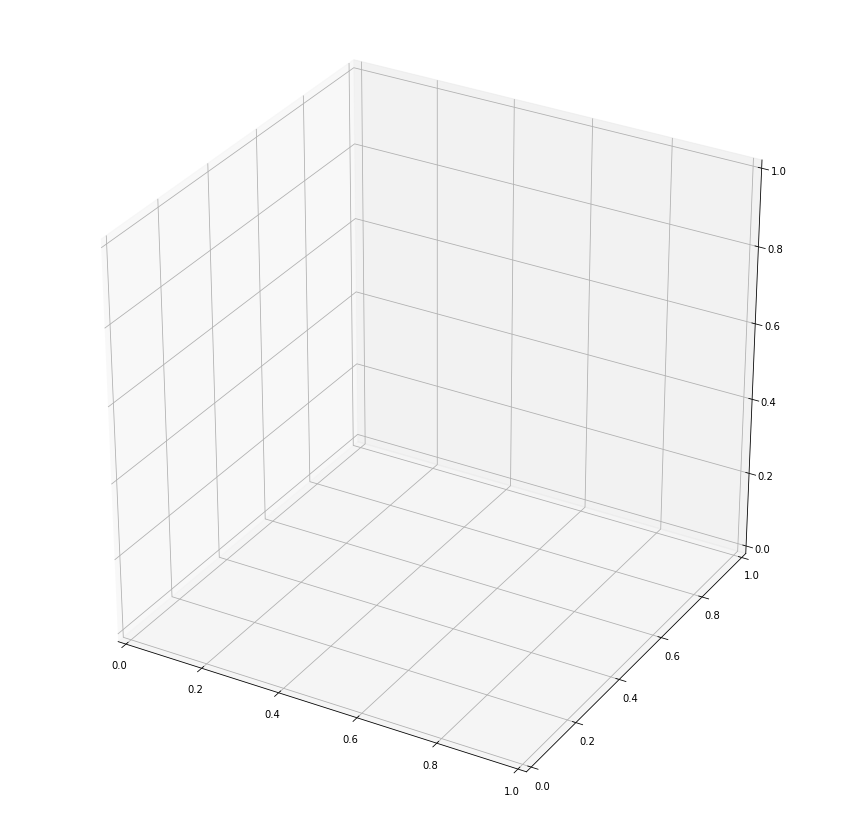

In [31]:
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt

# Make this bigger to generate a dense grid.
N = 100

# Create some random data.


# Create the x, y, and z coordinate arrays.  We use 
# numpy's broadcasting to do all the hard work for us.
# We could shorten this even more by using np.meshgrid.
x = np.arange(volume.shape[0])[:, None, None]
y = np.arange(volume.shape[1])[None, :, None]
z = np.arange(volume.shape[2])[None, None, :]
x, y, z = np.broadcast_arrays(x, y, z)

# Turn the volumetric data into an RGB array that's
# just grayscale.  There might be better ways to make
# ax.scatter happy.
c = np.tile(volume.ravel()[:, None], [1, 3])

# Do the plotting in a single call.
fig = plt.figure(figsize=(15,15))
ax = fig.gca(projection='3d')
ax.scatter(x.ravel(),
           y.ravel(),
           z.ravel(),
           c=c)

In [32]:
res.keys()

dict_keys(['pv', 'delta', 'cash'])

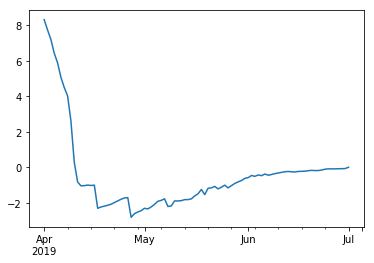

In [33]:
res['delta'].plot()

In [34]:
res['cash']

0.0

In [35]:
valuation_params_pv_only

{'layer_spacing': 5.0,
 'num_trigger_prices': 1,
 'reduce_inventory_max_backwards': True,
 'reduce_inventory_min_backwards': True,
 'pv_only': True}

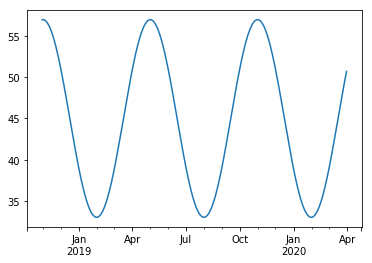

In [36]:
fwd_curve.plot()

In [37]:
env, vol_curve, dates = self.build_env(pricing_date)

In [38]:
vol_curve.plot()

In [39]:
env_evmlt = self.build_env_evmlt(pricing_date)

In [40]:
env_evmlt.keys()

dict_keys(['_STATE', 'NBP', 'GBP'])

In [41]:
env_evm = self.build_env_evm(pricing_date)

In [42]:
type(env_evm)

gazprom.mt.pricing.environment.environment.Environment

In [43]:
env_evmlt

Environment (intraday=False):
## _STATE
- currency: IdentityData: data_args={'data_type': <class 'str'>}, data:
unused
- pricing_date: IdentityData: data_args={'data_type': <class 'datetime.date'>}, data:
2018-10-30 00:00:00
- intraday: IdentityData: data_args={'data_type': <class 'bool'>}, data:
False
## NBP
- price: CurveData: allow_negative=False, is_corr=False, data_args={'builder': 'default', 'pricing_date': datetime.datetime(2018, 10, 30, 0, 0)}, builder=<gazprom.mt.pricing.environment.data_builders.DefaultDataBuilder object at 0x00000184E8F4F8C8>, data:
2018-10-30    56.986496
2018-10-31    56.998980
2018-11-01    56.997261
2018-11-02    56.981342
2018-11-03    56.951242
2018-11-04    56.906995
2018-11-05    56.848656
2018-11-06    56.776291
2018-11-07    56.689988
2018-11-08    56.589849
2018-11-09    56.475991
2018-11-10    56.348550
2018-11-11    56.207677
2018-11-12    56.053538
2018-11-13    55.886315
2018-11-14    55.706208
2018-11-15    55.513428
2018-11-16    55.308204
2

In [44]:
env_evmlt.historical_curves()

TypeError: historical_curves() missing 1 required positional argument: 'mkt'

In [45]:
pa(env_evmlt, True)


Public attributes
----------------------------------------------------------------------------------------------------
active                           | contract_expiry| get_data_object   | replace                
active_date_range                | convert_key    | has               | risk_factor_expiry     
active_spot_dates                | copy           | has_fx_rate       | risk_factor_expiry_rule
add                              | corr           | historical_curves | save                   
add_corr                         | corr_matrix    | historical_data   | spot_date_fx           
add_corr_matrix                  | currency       | is_contract_active| static_data            
add_empty_historical_data        | data_key_type  | is_fx             | static_data_state      
add_fixing                       | date_range     | is_intraday       | term_vol               
add_fixings                      | delete         | key_types         | terminal_vol           
add_historical_c

In [46]:
pa(test_payoff, True)

NameError: name 'test_payoff' is not defined

In [47]:
C:\dev\code\Gazprom_MT\pricing\gazprom\mt\pricing\models\storage\tests\test_payoff.py

SyntaxError: unexpected character after line continuation character (<ipython-input-47-01f80d312bbc>, line 1)

In [116]:
from gazprom.mt.pricing.models.storage.tests.test_payoff import TestStoragePayoff

In [117]:
myTest = TestStoragePayoff()

In [118]:
myTest.setUp()

In [119]:
myTest.test_markets()

In [120]:
myTest.test_buy_sell()

In [121]:
forward_dates = pd.date_range('01-Jan-2013', periods=366, freq='D')
simulation_dates = pd.date_range('01-Jan-2013', periods=12, freq='MS')

In [125]:
# NBP
nbp_forward = 40 + 10*np.sin(np.linspace(0, 2*np.pi, 366))
nbp_forward = pd.Series(nbp_forward, forward_dates)
alphas = (30, 0,)
sigmas = (0.6, 0.1,)
NBP = MultiFactorSimulator(alphas, sigmas, nbp_forward, name='NBP')

In [126]:
# ZEE
zee_forward = 40 + 10*np.cos(np.linspace(0, 2*pi, 366))
zee_forward = pd.Series(zee_forward, forward_dates)
alphas = (25, 0.05,)
sigmas = (0.5, 0.2,)
ZEE = MultiFactorSimulator(alphas, sigmas, zee_forward, name='ZEE')

In [127]:
correlation = np.array([[ 1. ,  0. ,  0.7,  0. ],
                        [ 0. ,  1. ,  0. ,  0.1],
                        [ 0.7,  0. ,  1. ,  0. ],
                        [ 0. ,  0.1,  0. ,  1. ]])
model = MultiCommoditySimulator([NBP, ZEE], correlation, valuation_date='01-Jan-2013')

In [128]:
model

## Creating Spot Simulations

In [129]:
from gazprom.mt.pricing.lib.random import WhiteNoise

In [130]:
seed = 124243
noise = WhiteNoise(t0=forward_dates[0], nsims=100, cov=np.eye(4),
                       seed=seed)

In [131]:
spot_simulations = model.simulate_spot(forward_dates,innovations=noise)
spot_simulations

C:\dev\code\Gazprom_MT\pricing\gazprom\mt\pricing\lib\random.py:141: UserWarning: `gramschmidt` normalisation cannot be performed. 
The input matrix has insufficient rank for orthogonalisation.
  warnings.warn(msg)


<xarray.DataArray (items: 2, major_axis: 366, minor_axis: 100)>
array([[[40.      , 40.      , ..., 40.      , 40.      ],
        [39.368845, 39.972072, ..., 40.48766 , 40.901205],
        ...,
        [49.697808, 40.338904, ..., 42.392585, 33.349666],
        [51.0193  , 41.813226, ..., 42.568347, 32.630794]],

       [[50.      , 50.      , ..., 50.      , 50.      ],
        [48.463474, 48.894598, ..., 51.402676, 50.417119],
        ...,
        [55.156027, 34.379204, ..., 56.62072 , 42.979893],
        [56.353491, 35.589377, ..., 56.390938, 41.403233]]])
Coordinates:
  * items       (items) object 'NBP' 'ZEE'
  * major_axis  (major_axis) datetime64[ns] 2013-01-01 2013-01-02 ... 2014-01-01
  * minor_axis  (minor_axis) int32 0 1 2 3 4 5 6 7 8 ... 92 93 94 95 96 97 98 99

C:\Users\ashubert\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: FutureWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.

  """Entry point for launching an IPython kernel.


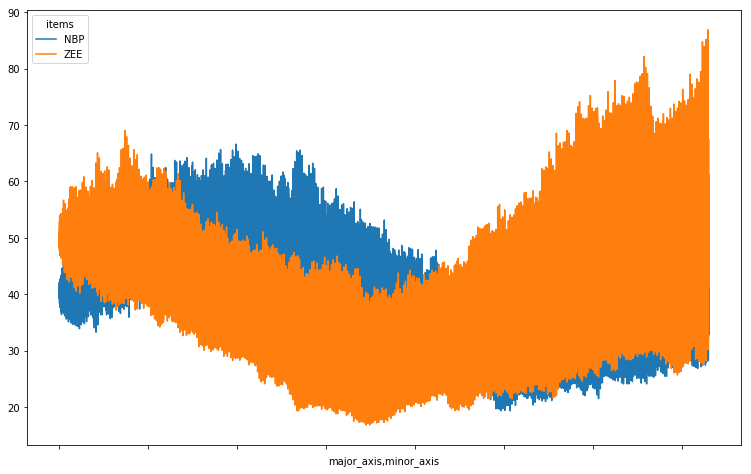

In [132]:
spot_simulations.to_pandas().to_frame().drop_duplicates().plot(figsize=(8*1.6,8))

In [133]:
from gazprom.mt.pricing.lib.numerics import gramschmidt

In [134]:
gramschmidt

<function gazprom.mt.pricing.lib.numerics.gramschmidt>

In [135]:
nbp = spot_simulations.loc['NBP'].to_dataframe(name='NBP').reset_index()[['major_axis', 'NBP']].drop_duplicates().set_index('major_axis')

In [136]:
zee = spot_simulations.loc['ZEE'].to_dataframe(name='ZEE').reset_index()[['major_axis', 'ZEE']].drop_duplicates().set_index('major_axis')

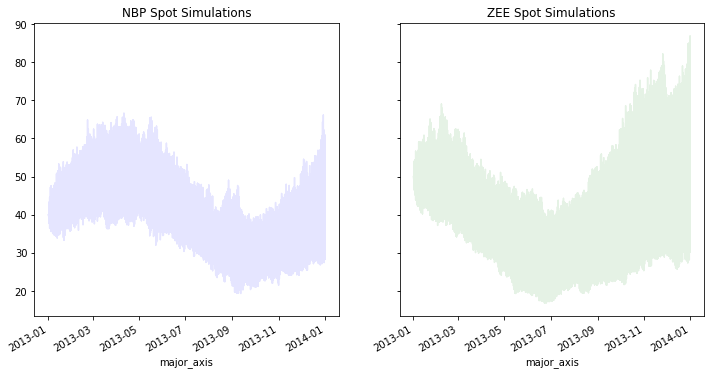

In [137]:
import matplotlib.pyplot as plt
fig, (ax0, ax1) = plt.subplots(1, 2, sharey=True, figsize=(12,6))
nbp.plot(c='b', alpha=0.1, legend=False, ax=ax0)
# nbp_forward.plot(c='b', linewidth=2, ax=ax0);
# ax0.legend([ax0.lines[-1]],['NBP Forward Curve'], loc=0)
ax0.set_title('NBP Spot Simulations');
#
zee.plot(c='g', alpha=0.1, legend=False, ax=ax1)
# zee_forward.plot(c='g', linewidth=2, ax=ax1);
# ax1.legend([ax1.lines[-1]],['ZEE Forward Curve'], loc=0)
ax1.set_title('ZEE Spot Simulations');

In [138]:
def side_by_side(lhs, rhs, lhs_heading='LHS', rhs_heading='RHS'):
    from IPython.display import HTML
    html = '''
    <table border="0">
        <th>{headL}</th><th>{headR}</th>
        <tr><td>{LHS}</td><td>{RHS}</td></tr>
    </table>
    '''.format(LHS=lhs._repr_html_(),
               headL=lhs_heading,
               RHS=rhs._repr_html_(),
               headR=rhs_heading)
    return HTML(html)
#

In [139]:
forward_curves = pd.concat([nbp,zee], axis=1)
forward_curves.columns = ['NBP','ZEE']
forward_curves.index.name = 'simulation_date'

## Creating Forward Simulations

In [140]:
forward_simulations = model.simulate_forward(simulation_dates, forward_dates, innovations=noise)

In [141]:
forward_simulations

<xarray.DataArray (commodity: 2, simulation_date: 12, forward_date: 366, nsim: 100)>
array([[[[40.      , ..., 40.      ],
         ...,
         [40.      , ..., 40.      ]],

        ...,

        [[      nan, ...,       nan],
         ...,
         [34.119477, ..., 40.507735]]],


       [[[50.      , ..., 50.      ],
         ...,
         [50.      , ..., 50.      ]],

        ...,

        [[      nan, ...,       nan],
         ...,
         [47.448634, ..., 45.283037]]]])
Coordinates:
  * commodity        (commodity) <U3 'NBP' 'ZEE'
  * simulation_date  (simulation_date) datetime64[ns] 2013-01-01 ... 2013-12-01
  * forward_date     (forward_date) datetime64[ns] 2013-01-01 ... 2014-01-01
  * nsim             (nsim) int32 0 1 2 3 4 5 6 7 8 ... 92 93 94 95 96 97 98 99

In [142]:
forward_simulations.loc['NBP']

<xarray.DataArray (simulation_date: 12, forward_date: 366, nsim: 100)>
array([[[40.      , 40.      , ..., 40.      , 40.      ],
        [40.172134, 40.172134, ..., 40.172134, 40.172134],
        ...,
        [39.827866, 39.827866, ..., 39.827866, 39.827866],
        [40.      , 40.      , ..., 40.      , 40.      ]],

       [[      nan,       nan, ...,       nan,       nan],
        [      nan,       nan, ...,       nan,       nan],
        ...,
        [39.575461, 42.051069, ..., 41.263176, 39.348051],
        [39.746504, 42.232811, ..., 41.441513, 39.518111]],

       ...,

       [[      nan,       nan, ...,       nan,       nan],
        [      nan,       nan, ...,       nan,       nan],
        ...,
        [33.876867, 42.936333, ..., 48.348303, 40.572768],
        [34.023026, 43.123194, ..., 48.557148, 40.750366]],

       [[      nan,       nan, ...,       nan,       nan],
        [      nan,       nan, ...,       nan,       nan],
        ...,
        [33.99317 , 44.126334, .

In [143]:
forward_simulations.loc['ZEE']

<xarray.DataArray (simulation_date: 12, forward_date: 366, nsim: 100)>
array([[[50.      , 50.      , ..., 50.      , 50.      ],
        [49.998518, 49.998518, ..., 49.998518, 49.998518],
        ...,
        [49.998518, 49.998518, ..., 49.998518, 49.998518],
        [50.      , 50.      , ..., 50.      , 50.      ]],

       [[      nan,       nan, ...,       nan,       nan],
        [      nan,       nan, ...,       nan,       nan],
        ...,
        [53.842533, 50.851663, ..., 48.230005, 48.232803],
        [53.843594, 50.853063, ..., 48.231682, 48.23448 ]],

       ...,

       [[      nan,       nan, ...,       nan,       nan],
        [      nan,       nan, ...,       nan,       nan],
        ...,
        [46.595058, 53.516355, ..., 54.380199, 47.005776],
        [46.597041, 53.519923, ..., 54.385439, 47.011228]],

       [[      nan,       nan, ...,       nan,       nan],
        [      nan,       nan, ...,       nan,       nan],
        ...,
        [47.490663, 52.306778, .

In [144]:
ax = axes()
for simulation_date in simulation_dates[3::4]:
    forward_simulations.loc['NBP'][simulation_date].plot(ax=ax, style='k-', alpha=0.2, legend=False)

NameError: name 'axes' is not defined

In [145]:
forward_simulations['NBP'].ix[2,:,0:10].head(10)

KeyError: 'NBP'